In [168]:
#long trajectory process
#memsi=219134000 or 215896000 both
library('data.table')
library('ggplot2')
library('ggmap')
library('dplyr')
source('../code/Function.R')
source('../code/FunctionForRealShip.R')
filePath='D:/Git/data/container/215896000.txt'

In [169]:
p0=fread(filePath);
p0=setNames(p0,c('mmsi','time','sog','lon','lat','status'));head(p0);dim(p0);setkey(p0,mmsi,time)

mmsi      time       sog lon     lat      status
1 215896000 1325059016 0   23.5885 37.95616 0     
2 215896000 1325059137 0   23.5885 37.95616 0     
3 215896000 1325059146 0   23.5885 37.95616 0     
4 215896000 1325059217 0   23.5885 37.95616 0     
5 215896000 1325059260 0   23.5885 37.95616 0     
6 215896000 1325059268 0   23.5885 37.95616 0

[1] 124580      6

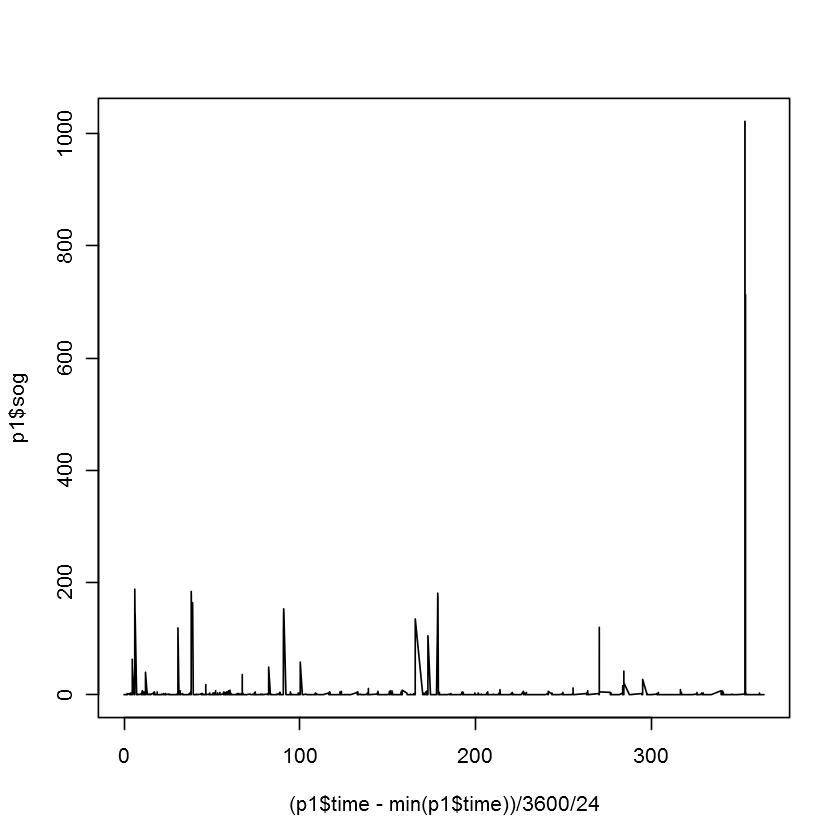

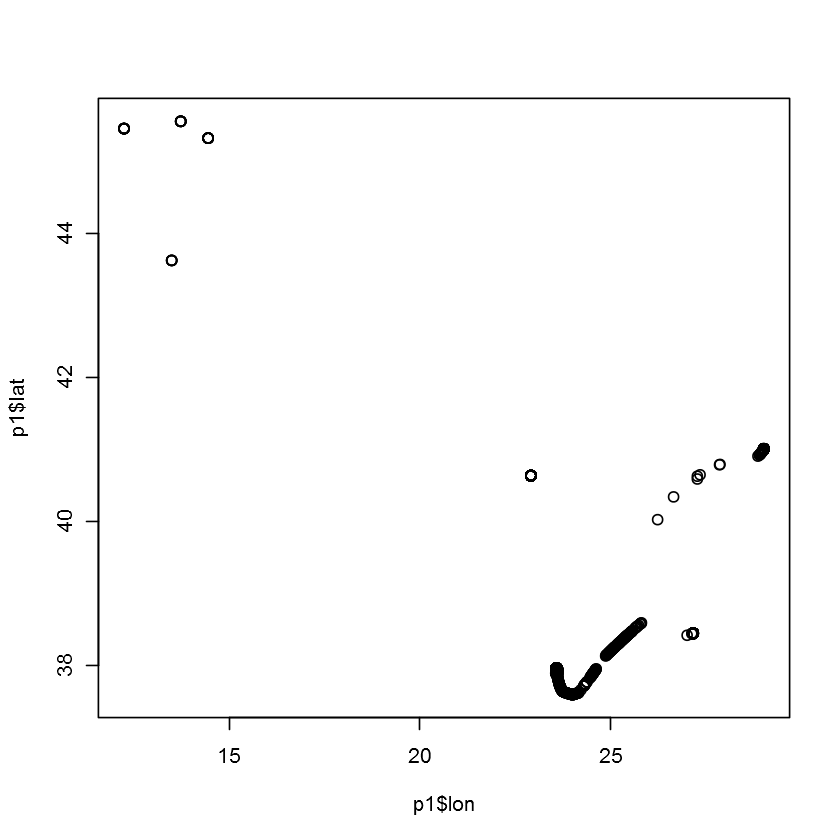

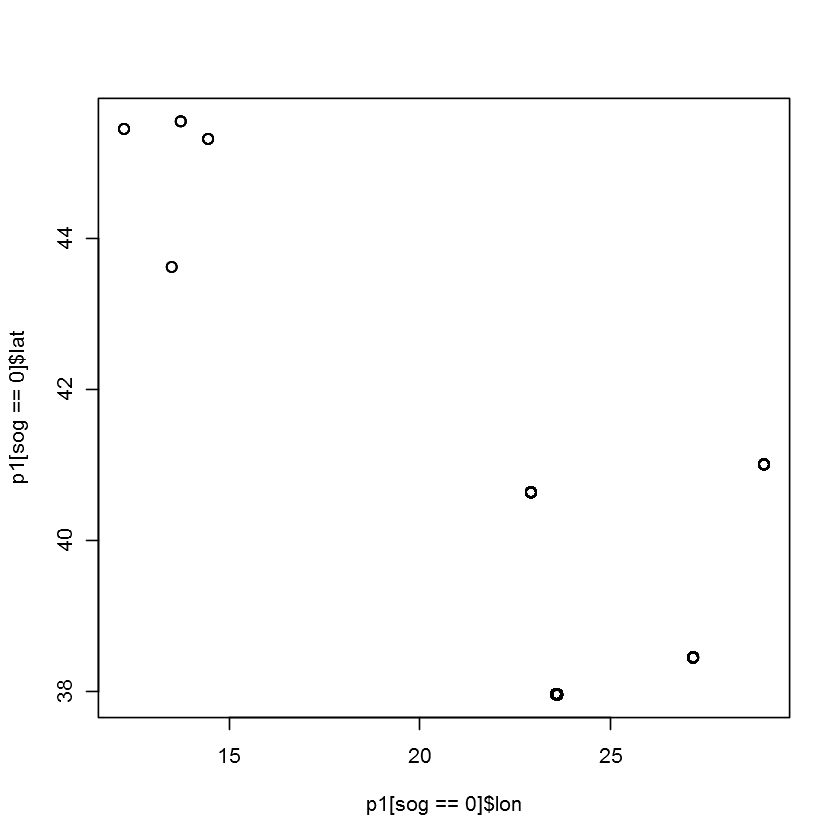

In [387]:
gridsize=1000
p1=setPoints(p0,gridsize)[0:1000000][status==5][sog==0]
plot((p1$time-min(p1$time))/3600/24,p1$sog,type='l')
plot(p1$lon,p1$lat)

In [372]:
cutspeed=10
timegap=5*3600
p2=p1[sog<cutspeed];
temp=p2
temp=setLines(temp)
temp=temp[,timespan:=abs(time1-time2)]
trips=breakTrajs(temp,timegap)
head(trips);trips[,.N,tpid];nrow(p2);nrow(trips)

mmsi      lon1    lat1     time1      sog1 pid1 gid1          g.lon1 g.lat1
1 215896000 29.0075 41.00600 1325462171 0    1097 29.007_41.006 29.007 41.006
2 215896000 29.0075 41.00600 1325468650 0    1098 29.007_41.006 29.007 41.006
3 215896000 29.0075 41.00600 1325470451 0    1099 29.007_41.006 29.007 41.006
4 215896000 29.0075 41.00617 1325470812 0    1100 29.007_41.006 29.007 41.006
5 215896000 29.0075 41.00600 1325471530 0    1101 29.007_41.006 29.007 41.006
6 215896000 29.0075 41.00600 1325471891 0    1102 29.007_41.006 29.007 41.006
  lon2    lat2     time2      sog2 pid2 gid2          g.lon2 g.lat2 lid
1 29.0075 41.00600 1325468650 0    1098 29.007_41.006 29.007 41.006 1  
2 29.0075 41.00600 1325470451 0    1099 29.007_41.006 29.007 41.006 2  
3 29.0075 41.00617 1325470812 0    1100 29.007_41.006 29.007 41.006 3  
4 29.0075 41.00600 1325471530 0    1101 29.007_41.006 29.007 41.006 4  
5 29.0075 41.00600 1325471891 0    1102 29.007_41.006 29.007 41.006 5  
6 29.0075 41.00600 1325472249 0    1103 29.007_41.006 29.007 41.006 6  
  timespan tpid
1 6479     1   
2 1801     1   
3  361     1   
4  718     1   
5  361     1   
6  358     1

tpid N   
1    1     26
2    2     57
3    3    511
4    4     22
5    5    108
6    6    342
7    7    499
8    8     54
9    9     30
10  10    298
11  11    121
12  12     84
13  13    609
14  14     61
15  15    146
16  16    496
17  17     50
18  18     71
19  19    234
20  20     40
21  21     43
22  22    430
23  23     45
24  24    115
25  25    917
26  26    142
27  27     42
28  28    860
29  29    807
30  30   1038
... ...  ... 
88  112  362 
89  115  828 
90  117    1 
91  118   90 
92  119  156 
93  121  220 
94  124  135 
95  125  406 
96  126   78 
97  127  119 
98  129  173 
99  130    2 
100 131  173 
101 132  130 
102 134  224 
103 135  297 
104 137  154 
105 138    1 
106 139    2 
107 140  270 
108 142    4 
109 144    2 
110 145  442 
111 146    1 
112 149    1 
113 150    1 
114 152  427 
115 154    8 
116 155   18 
117 156    8

[1] 17730

[1] 17574

# dbscan and optics based

In [373]:
library('dbscan')

In [388]:
x=data.table(p2[sog<10,list(lon,lat)]);
x=as.matrix(x)
cl=dbscan(x, eps=0.01, minPts = 1)

In [391]:
clusters=data.table(p2,cl$cluster);head(clusters)
dim(clusters);clusters[,.N,V2]

mmsi      time       sog lon     lat      status pid  g.lon  g.lat 
1 215896000 1325462171 0   29.0075 41.00600 5      1097 29.007 41.006
2 215896000 1325468650 0   29.0075 41.00600 5      1098 29.007 41.006
3 215896000 1325470451 0   29.0075 41.00600 5      1099 29.007 41.006
4 215896000 1325470812 0   29.0075 41.00617 5      1100 29.007 41.006
5 215896000 1325471530 0   29.0075 41.00600 5      1101 29.007 41.006
6 215896000 1325471891 0   29.0075 41.00600 5      1102 29.007 41.006
  gid           V2
1 29.007_41.006 1 
2 29.007_41.006 1 
3 29.007_41.006 1 
4 29.007_41.006 1 
5 29.007_41.006 1 
6 29.007_41.006 1

[1] 17730    11

V2 N    
1 1    686
2 2   1018
3 3  13550
4 4   1535
5 5    912
6 6      4
7 7     10
8 8      7
9 9      8

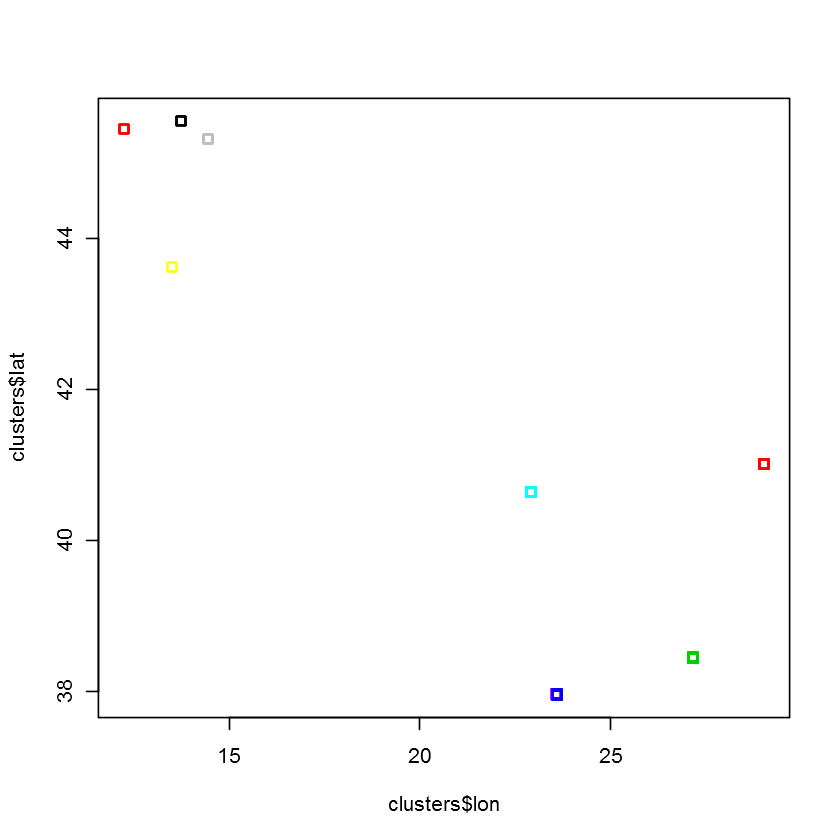

In [390]:
plot(clusters$lon,clusters$lat, col = clusters$V2+1L,pch=0.01)

# grid based trajectory and stay point detection

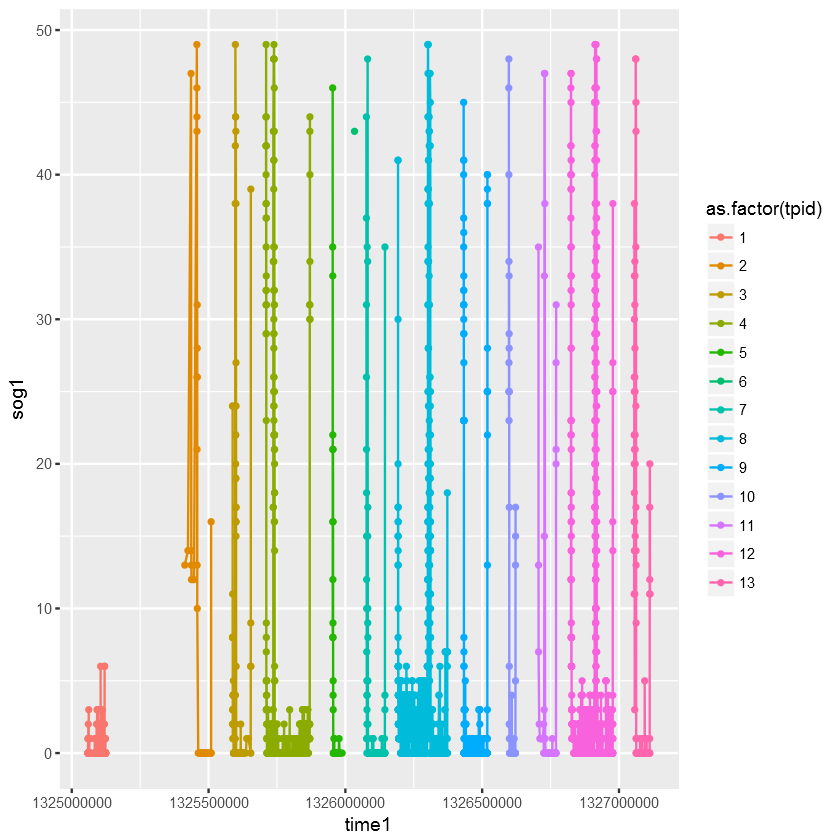

In [285]:
#before compress
temp=trips
p=ggplot()
p=p+geom_path(data=temp,aes(x=time1,y=sog1,group=tpid,color=as.factor(tpid)),size=0.5)
p=p+geom_point(data=temp,aes(x=time1,y=sog1,color=as.factor(tpid)),size=1)
p

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=39.441998,25.954916&zoom=5&size=640x640&scale=2&maptype=satellite&language=en-EN&sensor=false


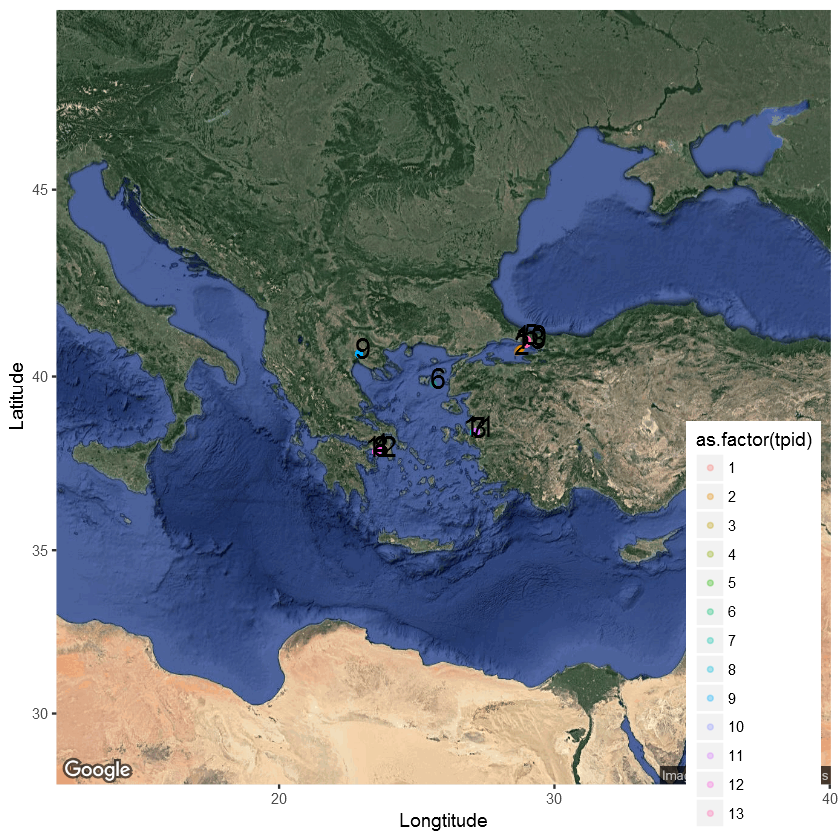

In [286]:
zoomsize=5
temp=trips[,list(mmsi,lon=lon1,lat=lat1,time=time1,sog=sog1,tpid)]
#p=getMap(temp,6)
centerX=0.5*(max(temp$lon)+min(temp$lon))
centerY=0.5*(max(temp$lat)+min(temp$lat))
p<-ggmap(get_map(location=c(centerX,centerY),zoom=zoomsize,source='google',maptype = 'satellite'))
#p=p+geom_path(data=temp,aes(x=lon,y=lat,group=tpid,color=as.factor(tpid)),size=0.5)
p=p+geom_point(data=temp,aes(x=lon,y=lat,group=tpid,color=as.factor(tpid)),size=1,alpha=0.3)
p=p+geom_text(data=temp[,.SD[1],tpid],nudge_x = 0.15,nudge_y = 0.15,aes(x=lon,y=lat,label=tpid),color='black',size=6)
#p=p+scale_fill_gradient('主机能 \n 耗(吨）',low='green',high='red')
p=p+labs(x="Longtitude",y="Latitude")+theme(legend.position=c(0.9,0.2))
p

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=37.911834,23.556832&zoom=13&size=640x640&scale=2&maptype=satellite&language=en-EN&sensor=false
Warning message:
"Removed 1 rows containing missing values (geom_text)."

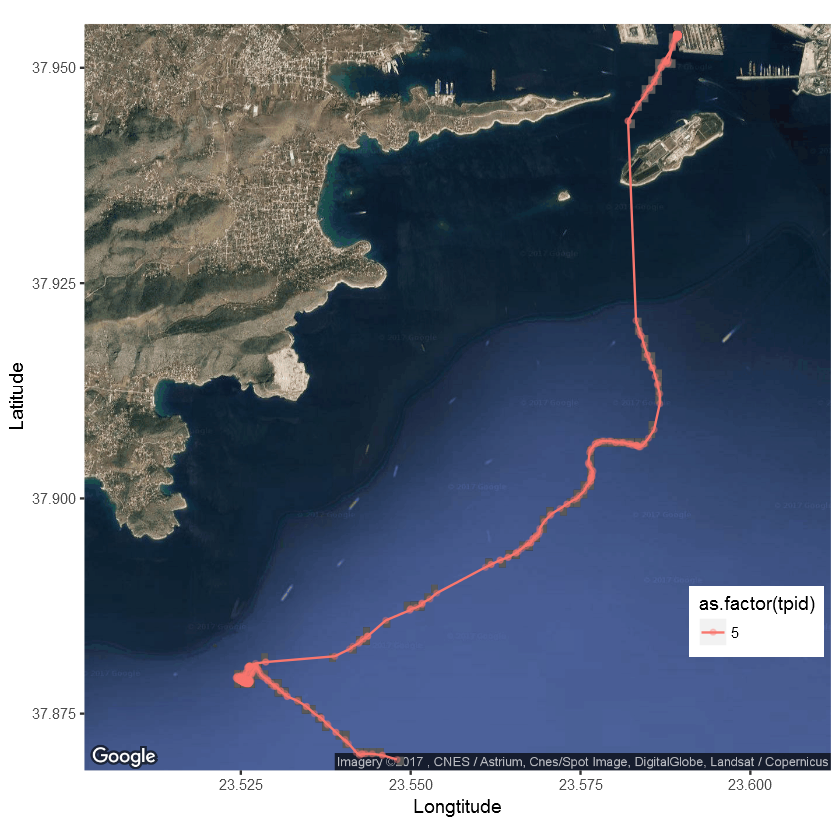

In [195]:
zoomsize=13
temp=trips[tpid==5,list(mmsi,lon=lon1,lat=lat1,time=time1,sog=sog1,g.lon=g.lon1,g.lat=g.lat1,tpid)]
#p=getMap(temp,6)
centerX=0.5*(max(temp$lon)+min(temp$lon))
centerY=0.5*(max(temp$lat)+min(temp$lat))
p<-ggmap(get_map(location=c(centerX,centerY),zoom=zoomsize,source='google',maptype = 'satellite'))
p=p+geom_rect(data=temp,aes(xmin=g.lon,xmax=g.lon+1/gridsize,ymin=g.lat,ymax=g.lat+1/gridsize),color='black',size=0.01)
p=p+geom_path(data=temp,aes(x=lon,y=lat,group=tpid,color=as.factor(tpid)),size=0.5)
p=p+geom_point(data=temp,aes(x=lon,y=lat,group=tpid,color=as.factor(tpid)),size=1,alpha=0.3)

p=p+geom_text(data=temp[,.SD[1],tpid],nudge_x = 0.15,nudge_y = 0.15,aes(x=lon,y=lat,label=tpid),color='black',size=6)
#p=p+scale_fill_gradient('主机能 \n 耗(吨）',low='green',high='red')
p=p+labs(x="Longtitude",y="Latitude")+theme(legend.position=c(0.9,0.2))
p

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=37.911834,23.556832&zoom=13&size=640x640&scale=2&maptype=satellite&language=en-EN&sensor=false
Warning message:
"Removed 1 rows containing missing values (geom_text)."

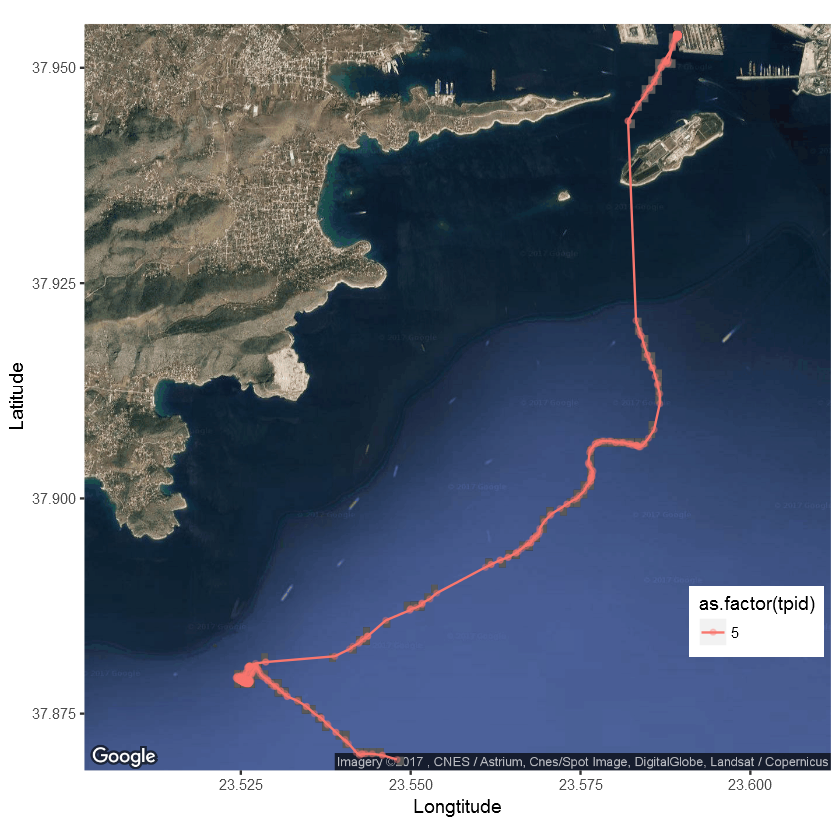

In [179]:
zoomsize=13
temp=trips[tpid==5,list(mmsi,lon=lon1,lat=lat1,time=time1,sog=sog1,g.lon=g.lon1,g.lat=g.lat1,tpid)]
#p=getMap(temp,6)
centerX=0.5*(max(temp$lon)+min(temp$lon))
centerY=0.5*(max(temp$lat)+min(temp$lat))
p<-ggmap(get_map(location=c(centerX,centerY),zoom=zoomsize,source='google',maptype = 'satellite'))
p=p+geom_rect(data=temp,aes(xmin=g.lon,xmax=g.lon+1/gridsize,ymin=g.lat,ymax=g.lat+1/gridsize),color='black',size=0.01)
p=p+geom_path(data=temp,aes(x=lon,y=lat,group=tpid,color=as.factor(tpid)),size=0.5)
p=p+geom_point(data=temp,aes(x=lon,y=lat,group=tpid,color=as.factor(tpid)),size=1,alpha=0.3)

p=p+geom_text(data=temp[,.SD[1],tpid],nudge_x = 0.15,nudge_y = 0.15,aes(x=lon,y=lat,label=tpid),color='black',size=6)
#p=p+scale_fill_gradient('主机能 \n 耗(吨）',low='green',high='red')
p=p+labs(x="Longtitude",y="Latitude")+theme(legend.position=c(0.9,0.2))
p

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=37.915834,23.571834&zoom=13&size=640x640&scale=2&maptype=satellite&language=en-EN&sensor=false
Warning message:
"Removed 1 rows containing missing values (geom_text)."

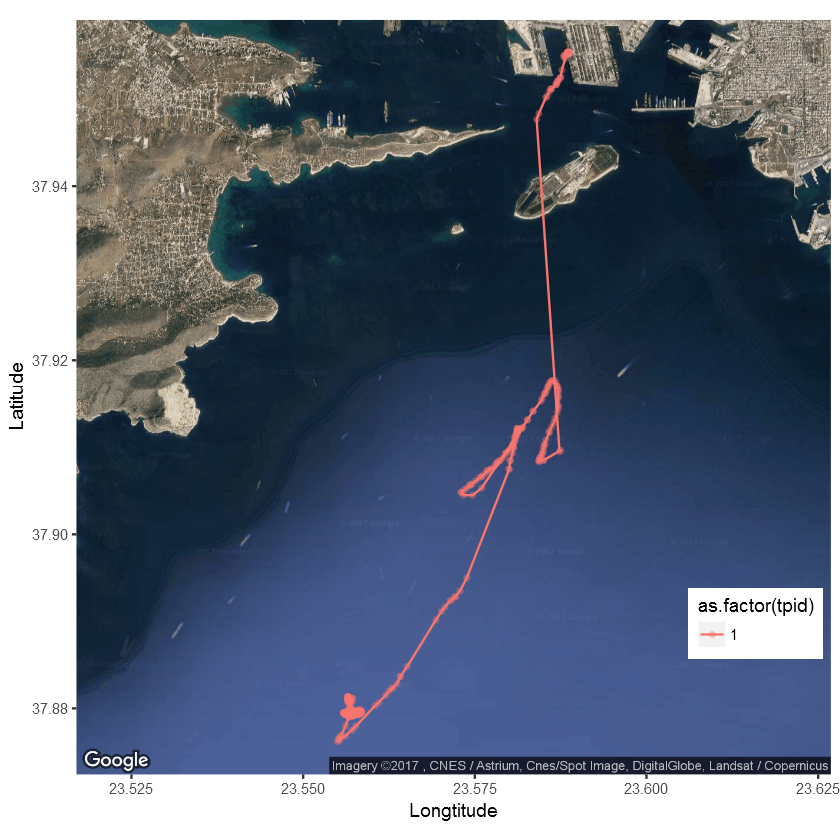

In [10]:
zoomsize=13
cluster=1
temp=trips[tpid==cluster,list(mmsi,lon=lon1,lat=lat1,time=time1,sog=sog1,tpid)]
#p=getMap(temp,6)
centerX=0.5*(max(temp$lon)+min(temp$lon))
centerY=0.5*(max(temp$lat)+min(temp$lat))
p<-ggmap(get_map(location=c(centerX,centerY),zoom=zoomsize,source='google',maptype = 'satellite'))
p=p+geom_path(data=temp,aes(x=lon,y=lat,group=tpid,color=as.factor(tpid)),size=0.5)
p=p+geom_point(data=temp,aes(x=lon,y=lat,group=tpid,color=as.factor(tpid)),size=1,alpha=0.3)
p=p+geom_text(data=temp[,.SD[1],tpid],nudge_x = 0.15,nudge_y = 0.15,aes(x=lon,y=lat,label=tpid),color='black',size=6)
#p=p+scale_fill_gradient('主机能 \n 耗(吨）',low='green',high='red')
p=p+labs(x="Longtitude",y="Latitude")+theme(legend.position=c(0.9,0.2))
p

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=40.627251,22.903833&zoom=15&size=640x640&scale=2&maptype=satellite&language=en-EN&sensor=false
Warning message:
"Removed 1 rows containing missing values (geom_text)."

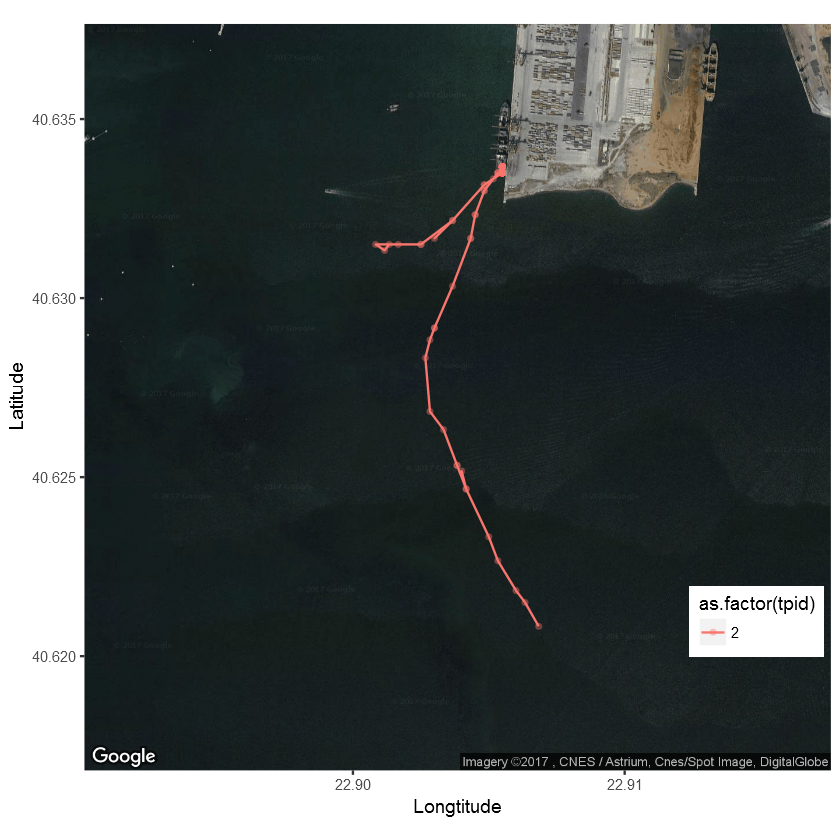

In [11]:
zoomsize=15
cluster=2
temp=trips[tpid==cluster,list(mmsi,lon=lon1,lat=lat1,time=time1,sog=sog1,tpid)]
#p=getMap(temp,6)
centerX=0.5*(max(temp$lon)+min(temp$lon))
centerY=0.5*(max(temp$lat)+min(temp$lat))
p<-ggmap(get_map(location=c(centerX,centerY),zoom=zoomsize,source='google',maptype = 'satellite'))
p=p+geom_path(data=temp,aes(x=lon,y=lat,group=tpid,color=as.factor(tpid)),size=0.5)
p=p+geom_point(data=temp,aes(x=lon,y=lat,group=tpid,color=as.factor(tpid)),size=1,alpha=0.3)
p=p+geom_text(data=temp[,.SD[1],tpid],nudge_x = 0.15,nudge_y = 0.15,aes(x=lon,y=lat,label=tpid),color='black',size=6)
#p=p+scale_fill_gradient('主机能 \n 耗(吨）',low='green',high='red')
p=p+labs(x="Longtitude",y="Latitude")+theme(legend.position=c(0.9,0.2))
p

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=38.441083,27.12675&zoom=13&size=640x640&scale=2&maptype=satellite&language=en-EN&sensor=false
Warning message:
"Removed 1 rows containing missing values (geom_text)."

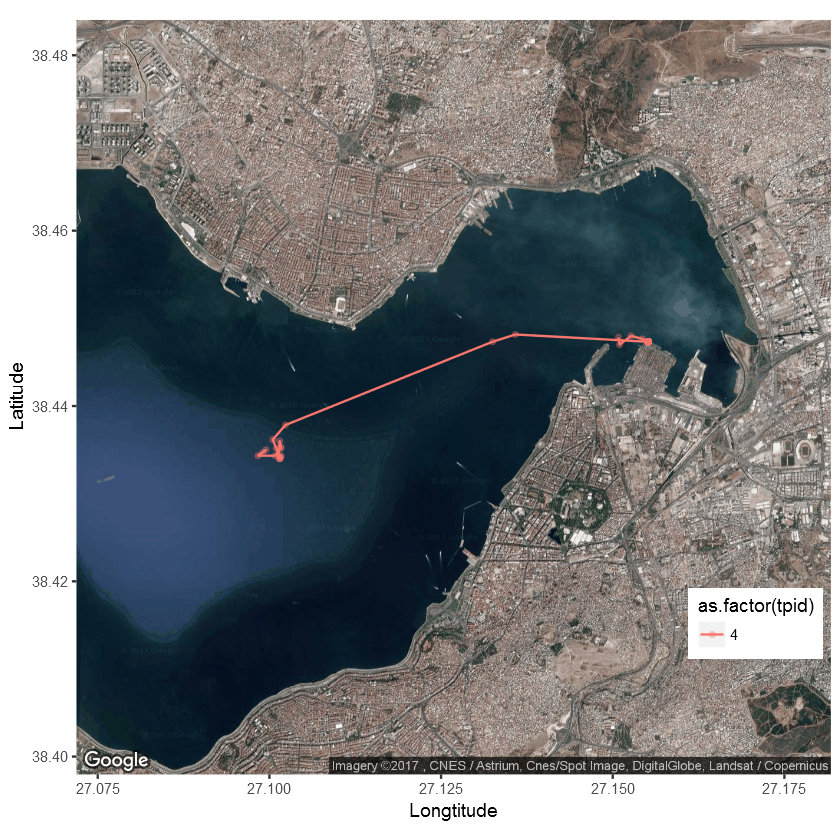

In [12]:
zoomsize=13
cluster=4
temp=trips[tpid==cluster,list(mmsi,lon=lon1,lat=lat1,time=time1,sog=sog1,tpid)]
#p=getMap(temp,6)
centerX=0.5*(max(temp$lon)+min(temp$lon))
centerY=0.5*(max(temp$lat)+min(temp$lat))
p<-ggmap(get_map(location=c(centerX,centerY),zoom=zoomsize,source='google',maptype = 'satellite'))
p=p+geom_path(data=temp,aes(x=lon,y=lat,group=tpid,color=as.factor(tpid)),size=0.5)
p=p+geom_point(data=temp,aes(x=lon,y=lat,group=tpid,color=as.factor(tpid)),size=1,alpha=0.3)
p=p+geom_text(data=temp[,.SD[1],tpid],nudge_x = 0.15,nudge_y = 0.15,aes(x=lon,y=lat,label=tpid),color='black',size=6)
#p=p+scale_fill_gradient('主机能 \n 耗(吨）',low='green',high='red')
p=p+labs(x="Longtitude",y="Latitude")+theme(legend.position=c(0.9,0.2))
p

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=41.002582,29.003417&zoom=14&size=640x640&scale=2&maptype=satellite&language=en-EN&sensor=false
Warning message:
"Removed 1 rows containing missing values (geom_text)."

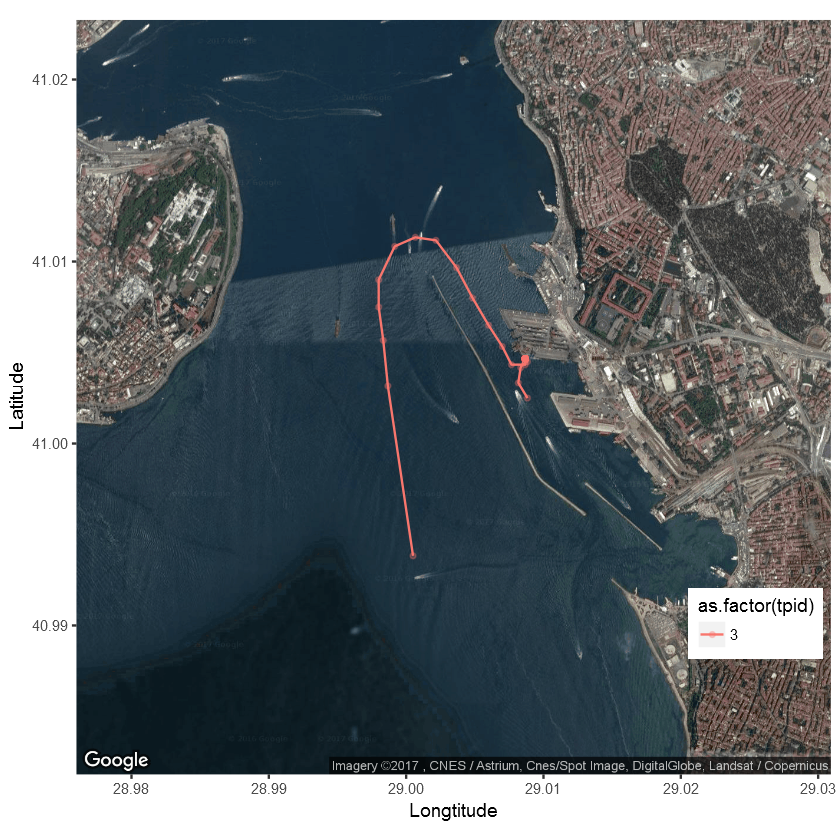

In [13]:
zoomsize=14
cluster=3
temp=trips[tpid==cluster,list(mmsi,lon=lon1,lat=lat1,time=time1,sog=sog1,tpid)]
#p=getMap(temp,6)
centerX=0.5*(max(temp$lon)+min(temp$lon))
centerY=0.5*(max(temp$lat)+min(temp$lat))
p<-ggmap(get_map(location=c(centerX,centerY),zoom=zoomsize,source='google',maptype = 'satellite'))
p=p+geom_path(data=temp,aes(x=lon,y=lat,group=tpid,color=as.factor(tpid)),size=0.5)
p=p+geom_point(data=temp,aes(x=lon,y=lat,group=tpid,color=as.factor(tpid)),size=1,alpha=0.3)
p=p+geom_text(data=temp[,.SD[1],tpid],nudge_x = 0.15,nudge_y = 0.15,aes(x=lon,y=lat,label=tpid),color='black',size=6)
#p=p+scale_fill_gradient('主机能 \n 耗(吨）',low='green',high='red')
p=p+labs(x="Longtitude",y="Latitude")+theme(legend.position=c(0.9,0.2))
p

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=40.957833,28.991166&zoom=12&size=640x640&scale=2&maptype=satellite&language=en-EN&sensor=false
Warning message:
"Removed 1 rows containing missing values (geom_text)."

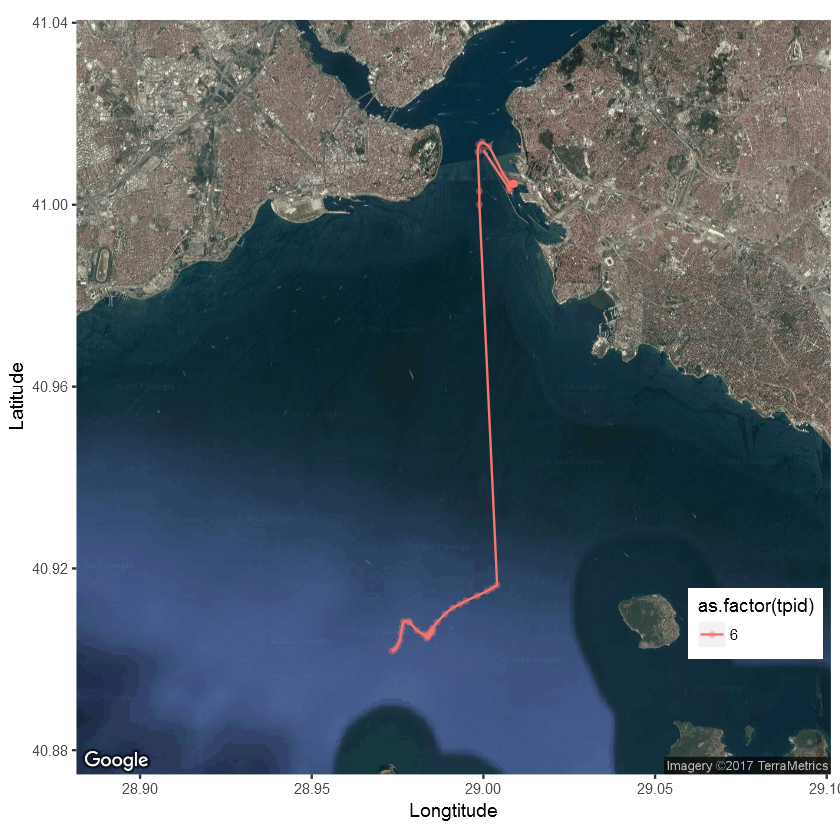

In [14]:
zoomsize=12
cluster=6
temp=trips[tpid==cluster,list(mmsi,lon=lon1,lat=lat1,time=time1,sog=sog1,tpid)]
#p=getMap(temp,6)
centerX=0.5*(max(temp$lon)+min(temp$lon))
centerY=0.5*(max(temp$lat)+min(temp$lat))
p<-ggmap(get_map(location=c(centerX,centerY),zoom=zoomsize,source='google',maptype = 'satellite'))
p=p+geom_path(data=temp,aes(x=lon,y=lat,group=tpid,color=as.factor(tpid)),size=0.5)
p=p+geom_point(data=temp,aes(x=lon,y=lat,group=tpid,color=as.factor(tpid)),size=1,alpha=0.3)
p=p+geom_text(data=temp[,.SD[1],tpid],nudge_x = 0.15,nudge_y = 0.15,aes(x=lon,y=lat,label=tpid),color='black',size=6)
#p=p+scale_fill_gradient('主机能 \n 耗(吨）',low='green',high='red')
p=p+labs(x="Longtitude",y="Latitude")+theme(legend.position=c(0.9,0.2))
p

In [147]:
#grid based compress
scale=10000
tripids=trips[tpid==5,.N,tpid]$tpid
compressedTra=data.table(mmsi=0,time=0,sog=0,lon=0,lat=0,tpid=0,g.lon=0,g.lat=0)[mmsi<0]
for (tripid in tripids){
  trip=trips[tpid==tripid]
  trip=rbind(trip[,list(mmsi,time=time1,sog=sog1,lon=lon1,lat=lat1,tpid)],
             trip[nrow(trip),list(mmsi,time=time2,sog=sog2,lon=lon2,lat=lat2,tpid)])
  #grid based compression
  setkey(trip,time);
  t0=setPoints(trip,scale);setkey(t0,time);
  t1=distinct(t0[, .SD[c(1,median(seq(1:nrow(.SD))), nrow(.SD))], by = list(g.lon, g.lat)])
  compressedTra=rbind(t1[,list(mmsi,time,sog,lon,lat,tpid,g.lon,g.lat)],compressedTra)
  
}
dim(compressedTra);head(compressedTra);key(trip);

[1] 324   8

mmsi      time       sog lon      lat      tpid g.lon   g.lat  
1 215896000 1326824212 46  23.54800 37.86967 5    23.5479 37.8696
2 215896000 1326824302 42  23.54583 37.87017 5    23.5458 37.8701
3 215896000 1326824348 42  23.54583 37.87017 5    23.5458 37.8701
4 215896000 1326824362 37  23.54433 37.87033 5    23.5443 37.8703
5 215896000 1326824469 23  23.54333 37.87033 5    23.5433 37.8703
6 215896000 1326824483 12  23.54283 37.87033 5    23.5428 37.8703

[1] "time"

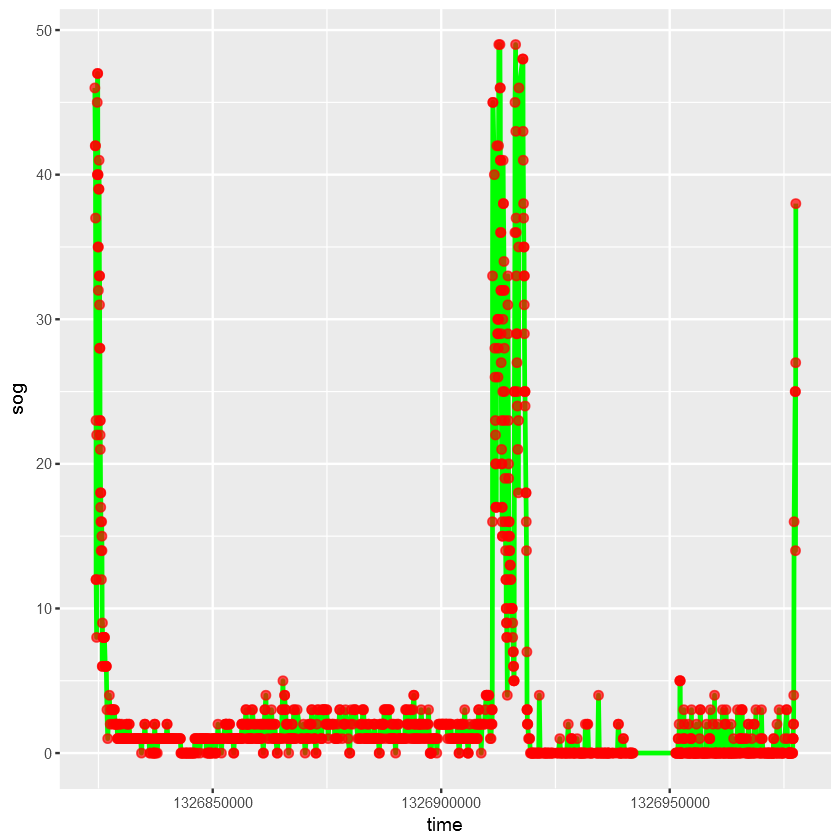

In [148]:
#before compression
temp=trips[tpid==5,list(mmsi,lon=lon1,lat=lat1,time=time1,sog=sog1,tpid)]
setkey(temp,time)
#plot(temp$time,temp$sog,type='l')
p=ggplot()
p=p+geom_path(data=temp,aes(x=time,y=sog,group=tpid),color='green',size=1)
p=p+geom_point(data=temp,aes(x=time,y=sog),color='red',size=2,alpha=0.7)
p

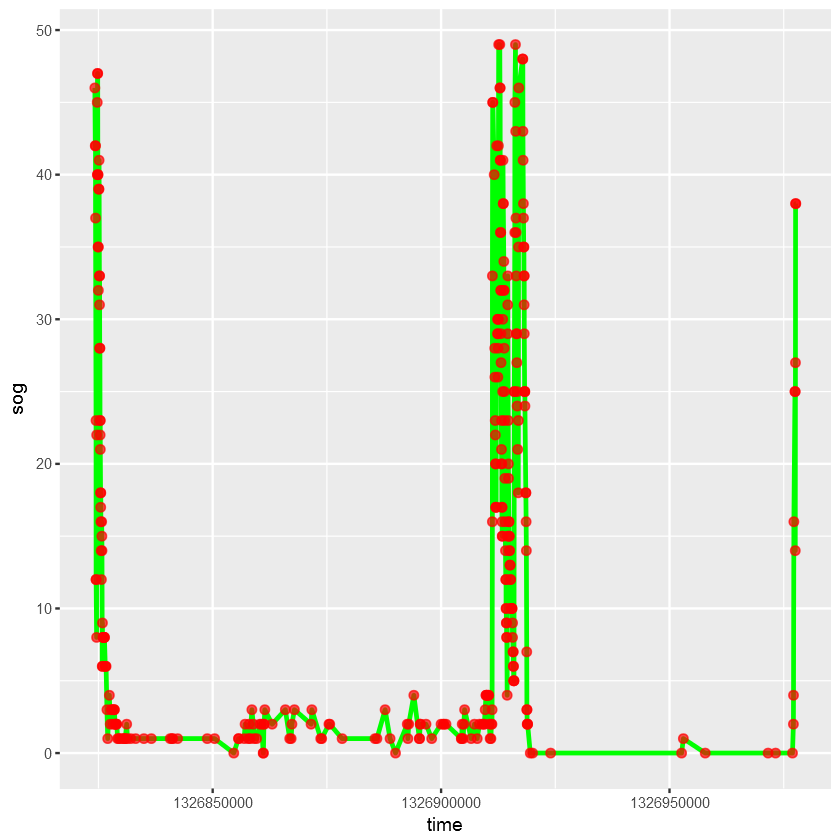

In [149]:
#after compression
temp=compressedTra
setkey(temp,time)
#plot(temp$time,temp$sog,type='l')
p=ggplot()
p=p+geom_path(data=temp,aes(x=time,y=sog,group=tpid),color='green',size=1)
p=p+geom_point(data=temp,aes(x=time,y=sog),color='red',size=2,alpha=0.7)
p

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=37.911834,23.556832&zoom=13&size=640x640&scale=2&maptype=satellite&language=en-EN&sensor=false
Warning message:
"Removed 1 rows containing missing values (geom_text)."

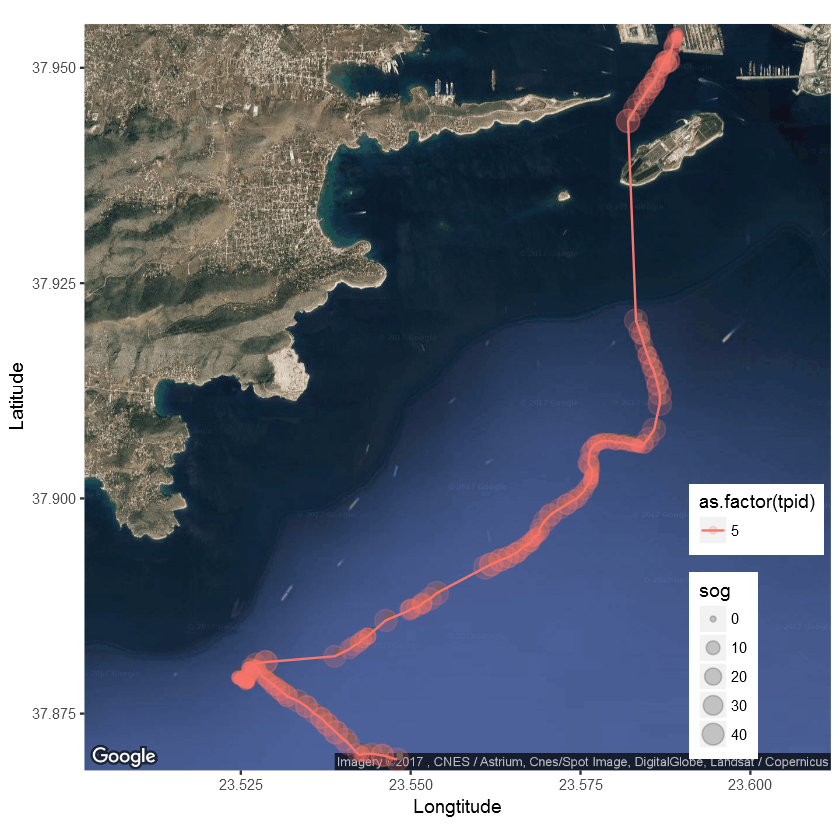

In [150]:
zoomsize=13
gridsize=1000
temp=compressedTra
#p=getMap(temp,6)
centerX=0.5*(max(temp$lon)+min(temp$lon))
centerY=0.5*(max(temp$lat)+min(temp$lat))
p<-ggmap(get_map(location=c(centerX,centerY),zoom=zoomsize,source='google',maptype = 'satellite'))
p=p+geom_rect(data=temp,aes(xmin=g.lon,xmax=g.lon+1/gridsize,ymin=g.lat,ymax=g.lat+1/gridsize),color='black',size=0.01)
p=p+geom_path(data=temp,aes(x=lon,y=lat,group=tpid,color=as.factor(tpid)),size=0.5)

p=p+geom_point(data=temp,aes(x=lon,y=lat,group=tpid,color=as.factor(tpid),size=sog),alpha=0.2)

p=p+geom_text(data=temp[,.SD[1],tpid],nudge_x = 0.15,nudge_y = 0.15,aes(x=lon,y=lat,label=tpid),color='black',size=6)
#p=p+scale_fill_gradient('主机能 \n 耗(吨）',low='green',high='red')
p=p+labs(x="Longtitude",y="Latitude")+theme(legend.position=c(0.9,0.2))
p

In [165]:
# stay points detection

time_threshold=600
dist_threshold=200
setkey(compressedTra,tpid,time)
tripids=compressedTra[,.N,tpid]$tpid
staytrips=data.table(mmsi=0,time=0,sog=0,lon=0,lat=0,g.lon=0,g.lat=0,tpid=0,staypoint=0)[mmsi<0]
for (tripid in tripids){
  #stay points detection
  temp=compressedTra[tpid==tripid]
  temp=setLines(setPoints(temp))
  temp[,staypoint:=0]
  i=1
  while (i <(nrow(temp))){
    j=i+1
    while (j<(1+nrow(temp))){
      dist=distance(temp[i]$lon1,temp[i]$lat1,temp[j]$lon1,temp[j]$lat1)
      if (dist>dist_threshold){
        deltaT=abs(temp[i]$time1-temp[j]$time1)
        if (deltaT>time_threshold){
          if(j-i>2){
            temp[i:(j-1),staypoint:=i] 
          } 
        }
        i=(j-1)
        break
      }
      #print(paste('i:',i,'j:',j,'d:',dist,'t:'))
      j=j+1
    }
    i=i+1
  }
  temp[,tpid:=tripid]
  staytrips=rbind(staytrips,temp[,list(mmsi,time=time1,sog=sog1,lon=lon1,lat=lat1,g.lon=g.lon1,g.lat=g.lat1,tpid,staypoint)],
                                 temp[nrow(temp),list(mmsi,time=time2,sog=sog2,lon=lon2,lat=lat2,g.lon=g.lon2,g.lat=g.lat2,tpid,staypoint)])
  
}
setkey(staytrips,tpid,time)
staytrips[,.N,list(tpid,staypoint)][staypoint>0][,sum(N)]#50 points has 9 stay points.
dim(staytrips);head(staytrips)
staytrips[,.N,list(tpid,staypoint)]

[1] 149

[1] 324   9

mmsi      time       sog lon      lat      g.lon g.lat tpid staypoint
1 215896000 1326824212 46  23.54800 37.86967 23.5  37.8  5    0        
2 215896000 1326824302 42  23.54583 37.87017 23.5  37.8  5    0        
3 215896000 1326824348 42  23.54583 37.87017 23.5  37.8  5    0        
4 215896000 1326824362 37  23.54433 37.87033 23.5  37.8  5    0        
5 215896000 1326824469 23  23.54333 37.87033 23.5  37.8  5    0        
6 215896000 1326824483 12  23.54283 37.87033 23.5  37.8  5    0

tpid staypoint N  
1 5      0       175
2 5     39        11
3 5     50       106
4 5    156        10
5 5    297        22

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=37.911751,23.557667&zoom=13&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false


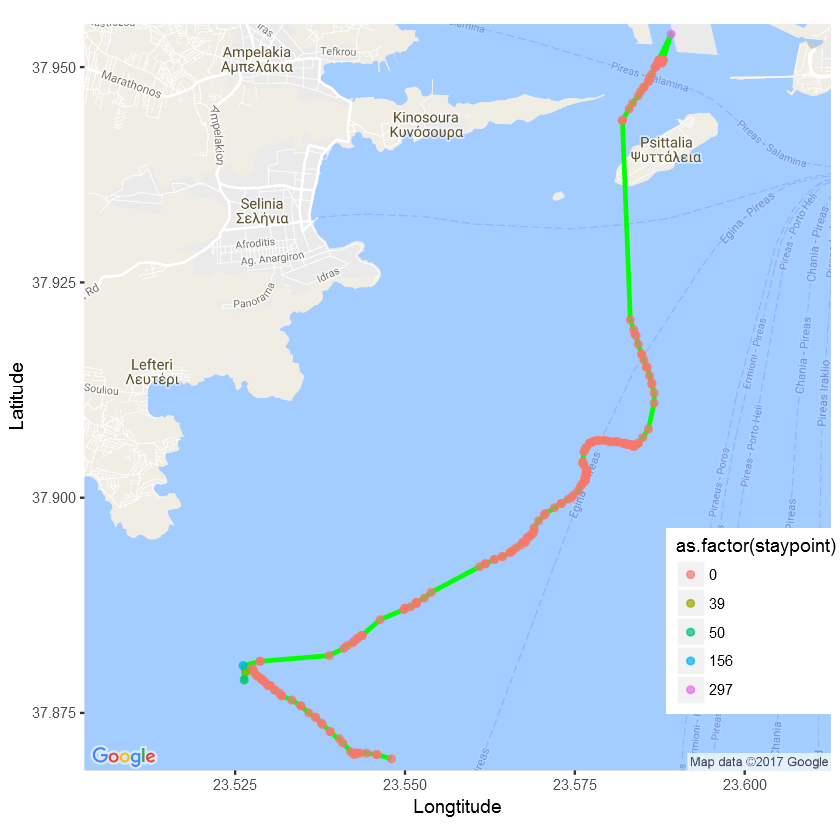

In [166]:
temp=rbind(staytrips[staypoint==0],staytrips[staypoint>0,(.SD[median(seq(1:nrow(.SD)))]),staypoint]);setkey(temp,time)
#temp=staytrips[staypoint>1&lon>23.51&lon<23.54&sog<10]
#plot stay point
#p=getMap(temp,6)
centerX=0.5*(max(temp$lon)+min(temp$lon))
centerY=0.5*(max(temp$lat)+min(temp$lat))
p<-ggmap(get_map(location=c(centerX,centerY),zoom=13,source='google',maptype = 'roadmap'))
p=p+geom_path(data=temp,aes(x=lon,y=lat),color='green',size=1)
p=p+geom_point(data=temp,aes(x=lon,y=lat,color=as.factor(staypoint)),alpha=0.7)
#p=p+geom_text(data=temp,aes(x=lon+0.1,y=lat+0.1,label=staypoint),color='black',size=5)
#p=p+scale_fill_gradient('主机能 \n 耗(吨）',low='green',high='red')
p=p+labs(x="Longtitude",y="Latitude")+theme(legend.position=c(0.9,0.2))
p

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=37.916209,23.557289&zoom=13&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false
Warning message:
"Removed 3 rows containing missing values (geom_text)."

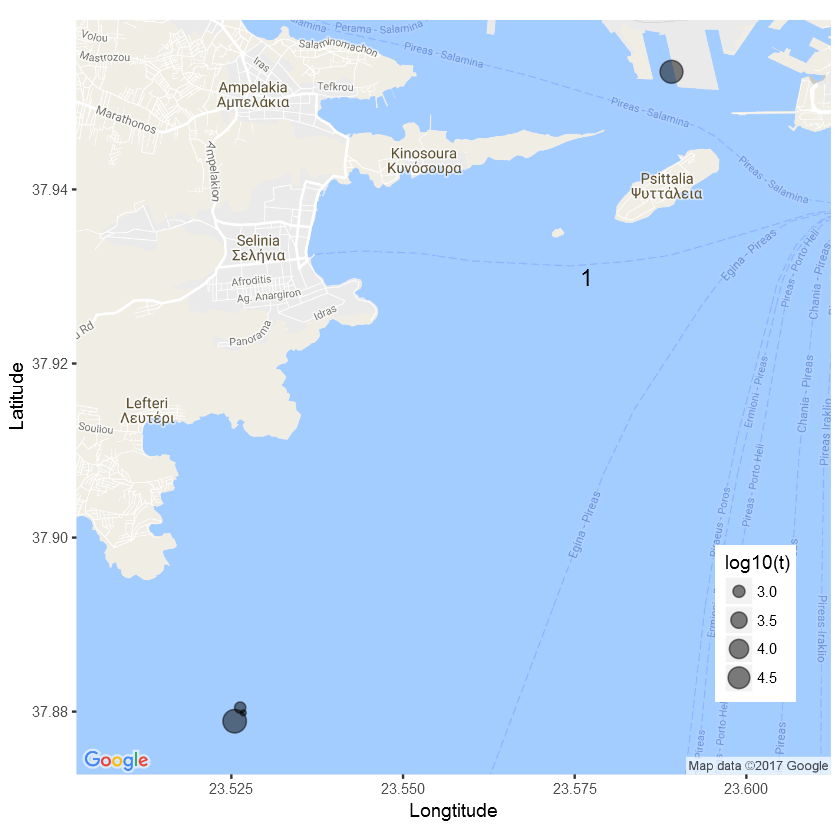

In [167]:
temp=staytrips[staypoint>0,list(lon=mean(lon),lat=mean(lat),sog=mean(sog),t=abs(.SD[1]$time-.SD[nrow(.SD)]$time)),list(tpid,staypoint)]
temp=cbind(temp,stayid=c(1:nrow(temp)))
#plot stay point
#p=getMap(temp,6)
centerX=0.5*(max(temp$lon)+min(temp$lon))
centerY=0.5*(max(temp$lat)+min(temp$lat))
p<-ggmap(get_map(location=c(centerX,centerY),zoom=13,source='google',maptype = 'roadmap'))
#p=p+geom_path(data=temp,aes(x=lon,y=lat),color='green',size=1)
p=p+geom_point(data=temp,aes(x=lon,y=lat,size=log10(t)),alpha=0.5)
p=p+geom_text(data=temp,aes(x=lon+0.1*stayid*0.5,y=lat+0.1*stayid*0.5,label=stayid),color='black',size=5)

#p=p+scale_fill_gradient('主机能 \n 耗(吨）',low='green',high='red')
p=p+labs(x="Longtitude",y="Latitude")+theme(legend.position=c(0.9,0.2))
p

In [108]:
head(temp)

tpid staypoint lon      lat      sog       t     stayid
1 5     36       23.52667 37.87980  7.600000   474 1     
2 5     41       23.52544 37.87895  2.230769 83575 2     
3 5    173       23.58888 37.95321 11.625000 58680 3